In [1]:
import numpy as np
from skimage import io, filters, img_as_ubyte
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import napari

from particle.pipeline import SandHeap

In [2]:
sandHeap = SandHeap(source="/media/chuan/000935950005A663/liutao/ct-images/",
                   se=ndi.generate_binary_structure(rank=3, connectivity=2), 
                   connectivity=2,
                   persistencePath='./data/liutao/',
                   cubeSize=64)
print(sandHeap.data.shape, sandHeap.data.dtype, sandHeap.status)

Function `_loadData` runs for 0h 1min 59.1s
(5000, 1766, 1766) uint8 data-loaded


In [3]:
# 要最中间的1500个颗粒
sandHeap.data = sandHeap.data[1750:3250]
sandHeap._getCircleMask()
print(sandHeap.data.shape, sandHeap.data.dtype, sandHeap.status)

(1500, 1766, 1766) uint8 data-loaded


Now plotting the histogram...
data-loaded


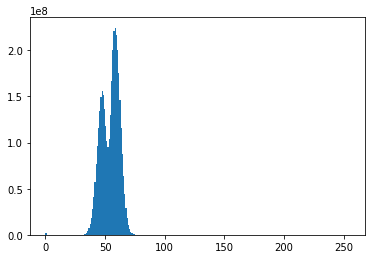

In [4]:
_ = sandHeap.drawHistogram()
print(sandHeap.status)

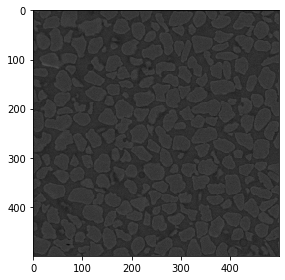

In [5]:
io.imshow(sandHeap.data[500][500:1000, 500:1000])

Now plotting the histogram...
Function `equalizeHist` runs for 0h 2min 47.7s


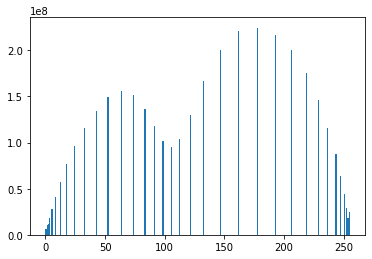

In [6]:
sandHeap.equalizeHist(draw=True)

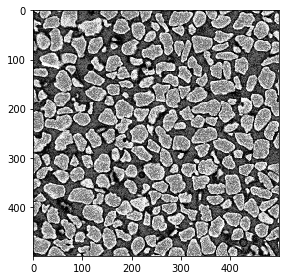

In [7]:
io.imshow(sandHeap.data[500][500:1000, 500:1000])

In [8]:
print(sandHeap.data.shape, sandHeap.data.dtype)

(1500, 1766, 1766) uint8


In [9]:
sandHeap.filter(method="median")

Function `filter` runs for 0h 21min 3.3s


Now plotting the histogram...


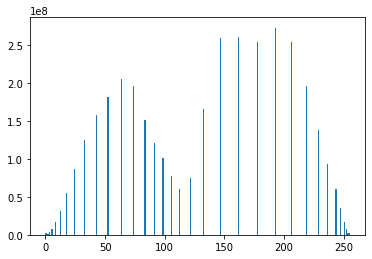

In [10]:
_ = sandHeap.drawHistogram()

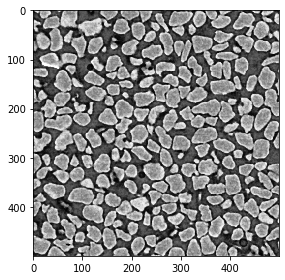

In [11]:
io.imshow(sandHeap.data[500][500:1000, 500:1000])

In [12]:
grayThrd = filters.threshold_multiotsu(sandHeap.data[sandHeap.circleMask], classes=2, nbins=255)
grayThrd

array([121])

Function `binarySegmentation` runs for 0h 0min 13.0s


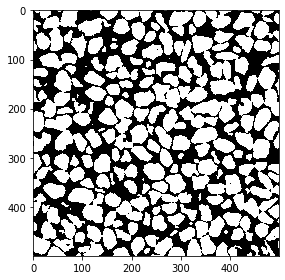

In [13]:
sandHeap.binarySegmentation(threshold=108)
io.imshow(img_as_ubyte(sandHeap.data[500][500:1000, 500:1000]))

Function `binaryOpening` runs for 0h 2min 2.2s


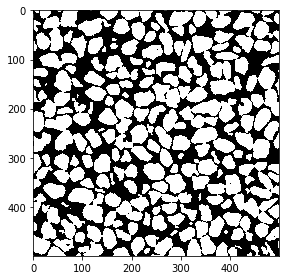

In [14]:
sandHeap.binaryOpening()
io.imshow(img_as_ubyte(sandHeap.data[500][500:1000, 500:1000]))

Function `binaryFillHoles` runs for 0h 4min 47.9s


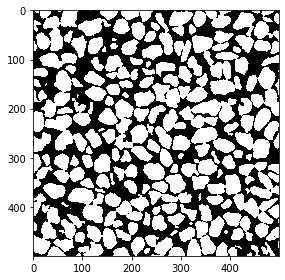

In [15]:
sandHeap.binaryFillHoles()
io.imshow(img_as_ubyte(sandHeap.data[500][500:1000, 500:1000]))

In [16]:
np.save('./data/liutao/binary.npy', sandHeap.data)